In [25]:
# Import libraries
import pandas as pd




In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight



In [27]:
import matplotlib.pyplot as plt

In [28]:
# Load the dataset
df = pd.read_csv("C:/Users/nora_/Downloads/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
#check the type of values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
#check for missing values
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
#check if there are zero values
zero_counts = (df == 0).sum()
print(zero_counts)


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [32]:
# in Glucose, BloodPressure, SkinThickness, Insulin, and BMI replace zero value with mean
def replace_zeros_with_mean(df, columns):
    for column in columns:
        mean_value = df[df[column] != 0][column].mean()  # Calculate mean excluding zeroes
        df[column] = df[column].replace(0, mean_value)  # Replace zeroes with mean
    return df

columns_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df = replace_zeros_with_mean(df, columns_to_fix)
df.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.1,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.6,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.0,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29,0


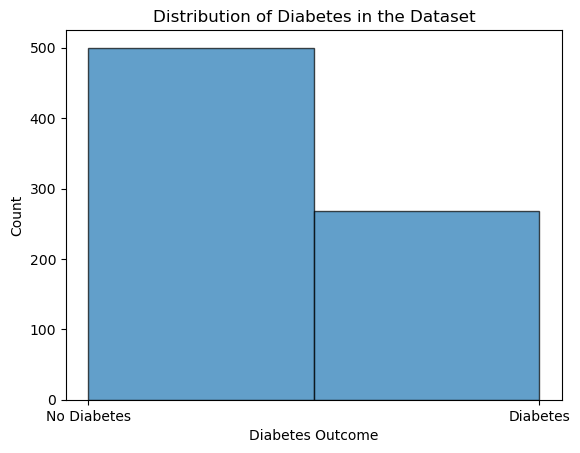

In [33]:
#Plot histogram of the Outcome variable to see the distribution of diabetes cases
plt.hist(df["Outcome"], bins=2, edgecolor='black', alpha=0.7)
plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.xlabel("Diabetes Outcome")
plt.ylabel("Count")
plt.title("Distribution of Diabetes in the Dataset")
plt.show()

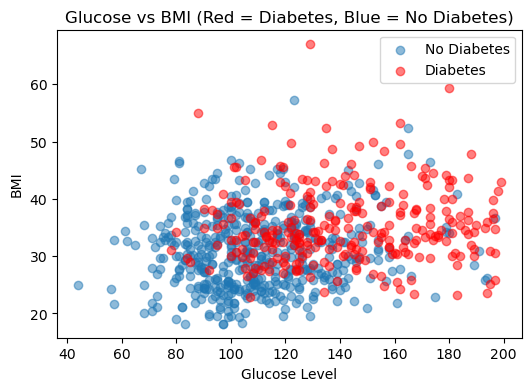

In [34]:
#Scatter plot to visualize Glucose vs BMI
plt.figure(figsize=(6,4))
plt.scatter(df[df["Outcome"] == 0]["Glucose"], df[df["Outcome"] == 0]["BMI"], label="No Diabetes", alpha=0.5)
plt.scatter(df[df["Outcome"] == 1]["Glucose"], df[df["Outcome"] == 1]["BMI"], label="Diabetes", alpha=0.5, color='red')
plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.title("Glucose vs BMI (Red = Diabetes, Blue = No Diabetes)")
plt.legend()
plt.show()

<Figure size 600x400 with 0 Axes>

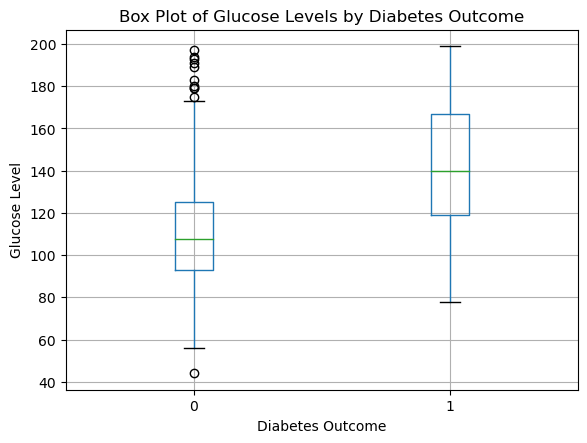

In [35]:
# Create a box plot to visualize the distribution of glucose levels for each outcome
plt.figure(figsize=(6,4))
df.boxplot(column="Glucose", by="Outcome", grid=True)
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level")
plt.title("Box Plot of Glucose Levels by Diabetes Outcome")
plt.suptitle("")  # Remove default title
plt.show()

In [36]:
#Split data into features and target variable

#Features is all the data without outcome
X = df.drop(columns=["Outcome"])  
#Target variable (0 = No Diabetes, 1 = Diabetes)
y = df["Outcome"]  


In [37]:
#Split into training vs testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#Normalise the data i.e. scale for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
import tensorflow as tf
import keras

In [40]:
#Build the neural network model
#Create a simple neural network with 3 layers
model = keras.Sequential()

#create input layer
model.add(keras.layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)))

#create hidden layer
model.add(keras.layers.Dense(8, activation="relu"))

#create output layer
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [41]:
# Compile the model i.e. how will it learn
model.compile(
    optimizer="adam",  
    loss="binary_crossentropy",  
    metrics=["accuracy"]
 ) 

In [42]:
history = model.fit(
    X_train,  
    y_train,  
    epochs=50, 
    batch_size=10,  
    validation_data=(X_test, y_test), 
    verbose=1)

Epoch 1/50
62/62 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6401 - val_loss: nan - val_accuracy: 0.6429
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 8/50
62/62 [==============================] - 0s 2ms/ste

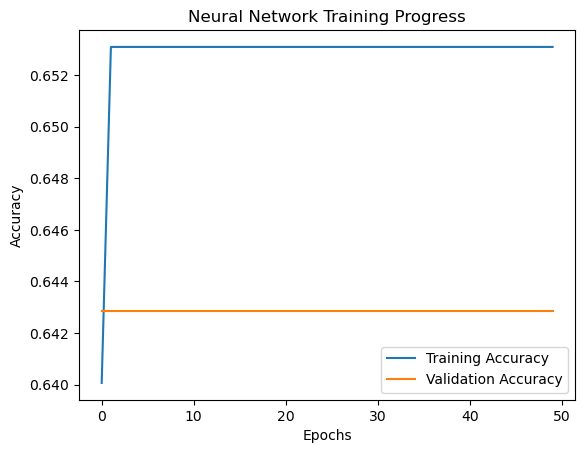

In [43]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Training Progress')
plt.legend()
plt.show()


Epoch 1/100
39/39 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.6498 - val_loss: nan - val_accuracy: 0.6429
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 4/100
39/39 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 8/100
39/39 [==============================] - 0s

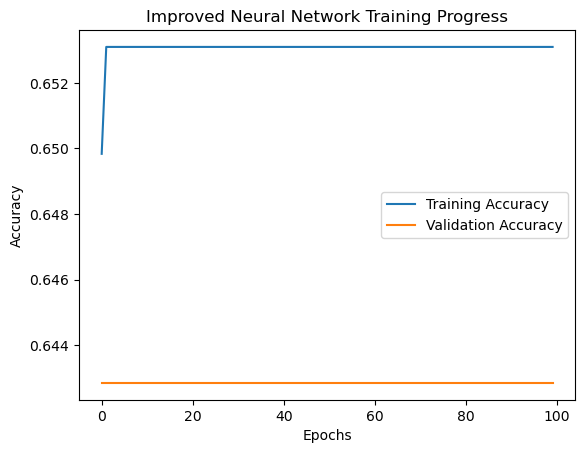

In [44]:
# Improve neural network model
model = keras.Sequential()

# Input layer: More neurons to capture patterns
model.add(keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)))

# Additional hidden layer for better learning
model.add(keras.layers.Dense(16, activation="relu"))

# Output layer with sigmoid activation for binary classification
model.add(keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Lower learning rate for better adjustments
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,  # Increased epochs for better learning
    batch_size=16,  # Slightly larger batch size
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Improved Neural Network Training Progress')
plt.legend()
plt.show()


In [45]:
print(df["Outcome"].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


In [46]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to 0 or 1

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



c:\Users\nora_\anaconda3\envs\new2\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nora_\anaconda3\envs\new2\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nora_\anaconda3\envs\new2\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
39/39 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6515 - val_loss: nan - val_accuracy: 0.6429
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 4/100
39/39 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 8/100
39/39 [==============================] - 0s

c:\Users\nora_\anaconda3\envs\new2\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nora_\anaconda3\envs\new2\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nora_\anaconda3\envs\new2\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


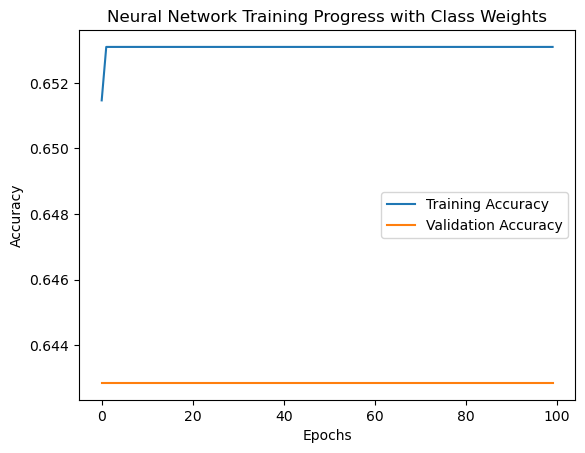

In [47]:
#Compute class weights to handle imbalance in the dataset
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

#Build the neural network model
model = keras.Sequential()

#Input layer
model.add(keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)))

#Hidden layer
model.add(keras.layers.Dense(16, activation="relu"))

#Output layer
model.add(keras.layers.Dense(1, activation="sigmoid"))

#Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

#Train the model with class weights
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,  # Apply class weights to balance learning
    verbose=1
)

#Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

#Generate classification report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

#Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Training Progress with Class Weights')
plt.legend()
plt.show()


Epoch 1/150
20/20 [==============================] - 0s 9ms/step - loss: 2403395480742166265856.0000 - accuracy: 0.4218 - val_loss: nan - val_accuracy: 0.6429
Epoch 2/150
20/20 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 3/150
20/20 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 4/150
20/20 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 5/150
20/20 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 6/150
20/20 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 7/150
20/20 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6531 - val_loss: nan - val_accuracy: 0.6429
Epoch 8/150
20/20 [============

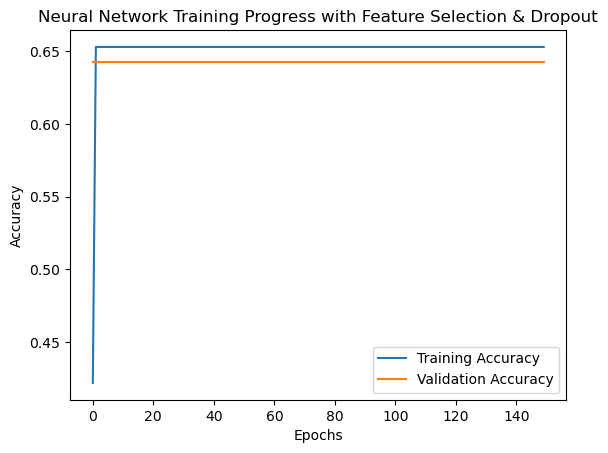

In [48]:
# Remove unhelpful features such as 'DiabetesPedigreeFunction' and 'SkinThickness' as they may not add much value
X = df.drop(columns=["Outcome", "DiabetesPedigreeFunction", "SkinThickness"])
y = df["Outcome"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (scaling for better performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the improved neural network model
model = keras.Sequential()

# Input layer with more neurons
model.add(keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dropout(0.3))  # Dropout to prevent overfitting

# Hidden layer
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dropout(0.3))  # Dropout layer to improve generalization

# Output layer with sigmoid activation
model.add(keras.layers.Dense(1, activation="sigmoid"))

# Compile the model with a lower learning rate for better adjustments
optimizer = keras.optimizers.Adam(learning_rate=0.0005)  # Lower learning rate for stability
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model with improved parameters
history = model.fit(
    X_train,
    y_train,
    epochs=150,  # Increased epochs for better learning
    batch_size=32,  # Larger batch size for stability
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Training Progress with Feature Selection & Dropout')
plt.legend()
plt.show()